In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import joblib

In [2]:
housing_encoder = LabelEncoder()
district_encoder = LabelEncoder()

In [3]:
data = pd.read_csv('../data/rent_lagos.csv')
data.columns

Index(['housing_type', 'bedrooms', 'bathrooms', 'guest_toilet',
       'parking_space', 'district', 'address', 'rent_per_annum'],
      dtype='object')

In [4]:
data.isna().sum()

housing_type      0
bedrooms          0
bathrooms         0
guest_toilet      0
parking_space     0
district          0
address           0
rent_per_annum    0
dtype: int64

In [5]:
data = data.drop('address',axis=1)

target = data['rent_per_annum']
features = data.drop('rent_per_annum',axis=1)

In [6]:
features['housing_type'] = housing_encoder.fit_transform(features['housing_type'])
features['district'] = district_encoder.fit_transform(features['district'])
features.head()

,housing_type,bedrooms,bathrooms,guest_toilet,parking_space,district
0,2,3,4,1,0,35
1,2,2,2,1,0,35
2,2,3,3,1,0,51
3,2,2,2,1,0,35
4,2,2,2,0,2,35


In [7]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=12)

In [8]:
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  
    n_estimators=100,             
    learning_rate=0.1,            
    max_depth=3                   
)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(features_train, target_train)

xgb_model = grid_search.best_estimator_


In [9]:
predictions = xgb_model.predict(features_test)


In [10]:
mse = mean_squared_error(target_test, predictions)
rmse = np.sqrt(mse)
mse

1.1455864480064256e+16

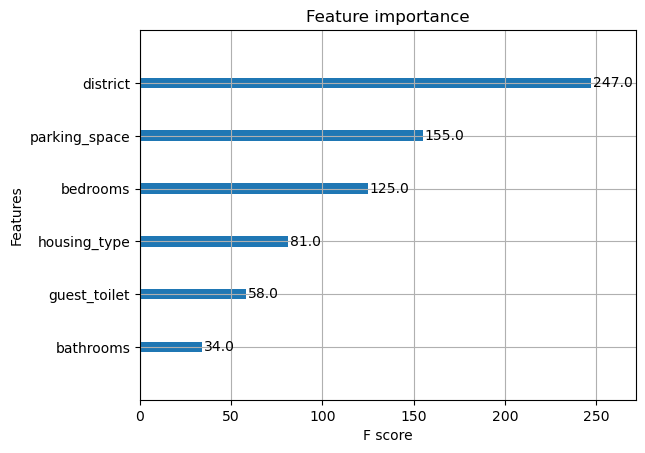

In [11]:
xgb.plot_importance(xgb_model)
plt.show()

In [12]:
joblib.dump(xgb_model, 'price_model.joblib')
joblib.dump(housing_encoder,'housing_encoder.pk1')
joblib.dump(district_encoder,'district_encoder.pk1')

['district_encoder.pk1']